In [2]:
import torch
import torchvision
from torchsummaryX import summary



from utils import DeviceDataLoader, hardware_check, to_device, build_model
from models import ModelLoader
from datasets import Sun397
import matplotlib.pyplot as plt
import numpy as np

from gym import Env
from gym.spaces import Discrete, Box

import os

from pathlib import Path
from PIL import Image

from collections import Counter



ModuleNotFoundError: No module named 'log'

# LOAD DATASET FUNCTION

In [3]:
PATH_DATASET_FOLDER = os.getcwd() + "/../dataset/SUN397/"

TRANSFORM_IMG = torchvision.transforms.Compose([
    #torchvision.transforms.Resize(256),
    #torchvision.transforms.CenterCrop(256),
    torchvision.transforms.Resize((362, 512), antialias=True),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

PATH_TRAIN_FOLDER=PATH_DATASET_FOLDER+"/train_selector"
train_data=Sun397(PATH_TRAIN_FOLDER,TRANSFORM_IMG)
print(train_data.num_classes)
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True,  num_workers=4)



271


# TEST SUI LABEL

In [6]:
#PATH_DATASET_FOLDER = os.getcwd() + "../dataset/SUN397/"
#PATH_TEST_FOLDER= PATH_DATASET_FOLDER+"/train_selector"

#img_dir=PATH_TEST_FOLDER
print(train_data.num_classes)
print(train_data.labels_to_remove)
print(" ")
print(train_data.labels)
print(" ")
print(train_data.labels_dict)


271
['apartment_building', 'apse', 'arrival_gate', 'athletic_field', 'atrium', 'badminton_court', 'bakery', 'balcony', 'basketball_court', 'bazaar', 'bistro', 'booth', 'bow_window', 'brewery', 'cabin', 'canal', 'car_interior', 'casino', 'cathedral', 'cavern', 'chicken_coop', 'church', 'cloister', 'control_tower', 'covered_bridge', 'cubicle', 'desert', 'diner', 'dinette', 'doorway', 'driving_range', 'elevator', 'escalator', 'factory', 'field', 'firing_range', 'florist_shop', 'forest', 'garage', 'gazebo', 'general_store', 'greenhouse', 'gymnasium', 'hangar', 'hotel', 'hot_tub', 'hunting_lodge', 'ice_skating_rink', 'inn', 'jacuzzi', 'jail', 'kennel', 'labyrinth', 'lake', 'library', 'lido_deck', 'market', 'moat', 'monastery', 'mosque', 'movie_theater', 'museum', 'nuclear_power_plant', 'observatory', 'oil_refinery', 'outhouse', 'parking_garage', 'pilothouse', 'planetarium', 'podium', 'poolroom', 'power_plant', 'pub', 'shopping_mall', 'stadium', 'stage', 'subway_station', 'swimming_pool', 's

# PROVE CON IL DATA LOADER

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([1, 3, 362, 512])
Labels batch shape: torch.Size([1])
torch.Size([1, 3, 362, 512])
torch.Size([3, 362, 512])
torch.Size([3, 362, 512])


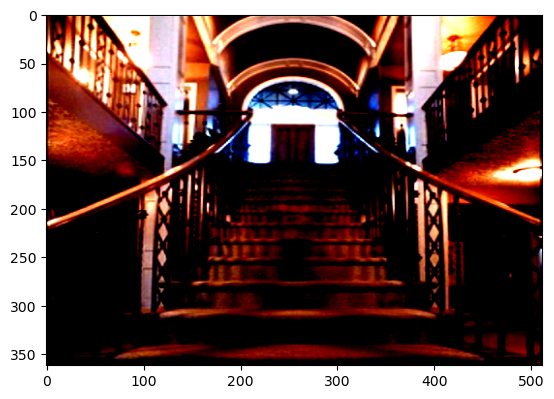

Label: 232


In [57]:
train_image, train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_image.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_image.size())
print(train_image[0].size())
print(train_image[0].squeeze().size())
      
img = train_image[0].permute(1,2,0)
label = train_labels[0].item()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [46]:
#print(os.getcwd()+'/models/Efficientnet_b0/best_valLoss_model.pth')
MODEL_NAME = "Efficientnet_b0"
env_path = Path("models/")
save_path = Path(env_path, MODEL_NAME)
print(os.path.join(save_path, "best_valLoss_model.pth"))

models\Efficientnet_b0\best_valLoss_model.pth


# PROVE PER ENSEBLE

In [1]:
from Ensemble import *
import torch
import torchvision
from utils import hardware_check, to_device, build_model
import os
from SUN397 import Sun397
from pathlib import Path


device = hardware_check()
PATH_DATASET_FOLDER = os.getcwd() + "/../dataset/SUN397/"
PATH_TRAIN_FOLDER=PATH_DATASET_FOLDER+  "train_selector"
PATH_TEST_FOLDER=PATH_DATASET_FOLDER+"/test"


TRANSFORM_IMG = torchvision.transforms.Compose([
    #torchvision.transforms.Resize(256),
    #torchvision.transforms.CenterCrop(256),
    torchvision.transforms.Resize((362, 512), antialias=True),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225] )
    ])

test_data=Sun397(PATH_TEST_FOLDER,TRANSFORM_IMG)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False,  num_workers =4)

MODEL1_NAME = "Efficientnet_b0"
MODEL2_NAME = "ShufflNetV2_x05"
MODEL3_NAME = "Squeezenet1_0"

#anche questa può essere una variabile in init
env_path =Path("models/")

pth_path_model = Path(env_path, MODEL1_NAME)
pth_path_mode2 = Path(env_path, MODEL2_NAME)
pth_path_mode3 = Path(env_path, MODEL3_NAME)

model1=torchvision.models.efficientnet_b0(weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT)
model1=to_device(build_model(model1), device)
model1.load_state_dict(torch.load(os.path.join(pth_path_model, "best_valLoss_model.pth")))
model1.eval()

# freeze layers
#for parameter in model_loaded.parameters():
 #   parameter.requires_grad = False

model2=torchvision.models.shufflenet_v2_x0_5(weights=torchvision.models.ShuffleNet_V2_X0_5_Weights.DEFAULT)
model2=to_device(build_model(model2), device)
model2.load_state_dict(torch.load(os.path.join(pth_path_mode2, "best_valLoss_model.pth")))
model2.eval()

model3=torchvision.models.squeezenet1_0(weights=torchvision.models.SqueezeNet1_0_Weights.DEFAULT)
model3=to_device(build_model(model3), device)
model3.load_state_dict(torch.load(os.path.join(pth_path_mode3, "best_valLoss_model.pth")))
model3.eval()

models=[model1,model2,model3]

hard_voting(models, test_data_loader)
soft_voting(models, test_data_loader,271)

Actual device:  cuda:0
Device info: name='NVIDIA GeForce GTX 1070 Ti', major=6, minor=1, total_memory=8191MB, multi_processor_count=19
The Accuracy Score of Hard Voting Ensemble is:  70.4847 %
The Accuracy Score of Soft Voting Ensemble is:  73.4694 %


[0,
 0,
 0,
 0,
 59,
 0,
 130,
 0,
 59,
 9,
 192,
 130,
 243,
 210,
 30,
 26,
 258,
 59,
 0,
 3,
 244,
 3,
 137,
 0,
 0,
 234,
 113,
 1,
 1,
 252,
 2,
 2,
 2,
 2,
 214,
 2,
 53,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 231,
 81,
 2,
 2,
 2,
 234,
 2,
 2,
 2,
 2,
 2,
 84,
 2,
 2,
 75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 152,
 2,
 228,
 3,
 3,
 3,
 3,
 3,
 3,
 189,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 28,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 104,
 5,
 51,
 5,
 5,
 5,
 56,
 5,
 5,
 6,
 187,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 189,
 204,
 6,
 6,
 45,
 6,
 6,
 148,
 6,
 58,
 6,
 46,
 6,
 6,
 6,
 6,
 6,
 6,
 145,
 246,
 118,
 6,
 46,
 245,
 30,
 6,
 6,
 6,
 6,
 7,
 221,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 20,
 46,
 9,
 9,
 9,
 9,
 9,
 210,
 33,
 9,
 9,
 46,
 9,
 256,
 4,
 9,
 9,
 9,
 9,
 208,
 159,
 10,
 81,
 49,
 10,
 10,
 10,
 10,
 10,
 10,
 154,
 11,
 11,
 11,
 11,
 51,
 7,
 139,
 12,
 255,
 12,
 12